In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [4]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [4]:
df.describe()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,39900.000000,3.990000e+04,9121.000000,3.765900e+04,2.993400e+04,38240.000000,38240.000000,3.943400e+04,3.943400e+04,3.943400e+04,...,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,38087.000000,38088.000000
mean,19949.500000,6.094339e+04,0.728210,3.536753e+08,2.872309e+05,6.427877,10.552354,2.017626e+02,1.096192e+03,9.547083e+03,...,4.486738e+05,2.129917e+05,4.489956e+05,4.013561e+05,3.390282e+05,3.439853e+05,1.375559e+05,8.265914e+03,0.074514,0.236137
std,11518.282207,2.598214e+05,3.107561,7.927850e+08,4.961607e+07,112.420166,177.143548,1.823295e+04,3.272456e+04,1.563888e+05,...,1.121988e+06,5.316487e+05,1.129791e+06,1.130969e+06,1.102586e+06,1.626701e+06,4.350107e+05,4.968480e+04,3.610742,12.155503
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9974.750000,8.680000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.976000e+03,1.186000e+03,2.740000e+03,3.660000e+03,5.240000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,19949.500000,3.082300e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.351960e+05,1.121640e+05,2.236870e+05,1.907450e+05,9.458700e+04,4.204100e+04,3.992000e+03,0.000000e+00,0.000000,0.000000
75%,29924.250000,4.889650e+04,0.000000,9.700000e+02,4.340000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.394680e+05,2.175255e+05,4.667520e+05,4.037860e+05,2.769340e+05,1.682435e+05,1.397730e+05,1.998500e+03,0.000000,0.000000
max,39899.000000,4.294967e+07,134.000000,2.130707e+09,8.584298e+09,11044.000000,14186.000000,3.376892e+06,3.708310e+06,1.004568e+07,...,3.123272e+07,1.454922e+07,2.454544e+07,5.743524e+07,3.160781e+07,3.755240e+07,1.718575e+07,4.570398e+06,350.000000,1720.000000


In [5]:
#the max of the max
print(f"the values range from {min(df.min())} to {max(df.max())}") # very wide scale

the values range from 0.0 to 8584297742.0


In [8]:
#missing values
for i in df.columns:
    print(i +" / " + str(df[i].isna().sum()))

Id / 0
aa_000 / 0
ab_000 / 30779
ac_000 / 2241
ad_000 / 9966
ae_000 / 1660
af_000 / 1660
ag_000 / 466
ag_001 / 466
ag_002 / 466
ag_003 / 466
ag_004 / 466
ag_005 / 466
ag_006 / 466
ag_007 / 466
ag_008 / 466
ag_009 / 466
ah_000 / 442
ai_000 / 417
aj_000 / 417
ak_000 / 2933
al_000 / 429
am_0 / 417
an_000 / 429
ao_000 / 390
ap_000 / 429
aq_000 / 390
ar_000 / 1813
as_000 / 417
at_000 / 417
au_000 / 417
av_000 / 1660
ax_000 / 1660
ay_000 / 468
ay_001 / 468
ay_002 / 468
ay_003 / 468
ay_004 / 468
ay_005 / 468
ay_006 / 468
ay_007 / 468
ay_008 / 468
ay_009 / 468
az_000 / 468
az_001 / 468
az_002 / 468
az_003 / 468
az_004 / 468
az_005 / 468
az_006 / 468
az_007 / 468
az_008 / 468
az_009 / 468
ba_000 / 476
ba_001 / 476
ba_002 / 476
ba_003 / 476
ba_004 / 476
ba_005 / 476
ba_006 / 476
ba_007 / 476
ba_008 / 476
ba_009 / 476
bb_000 / 442
bc_000 / 1813
bd_000 / 1814
be_000 / 1661
bf_000 / 1660
bg_000 / 429
bh_000 / 429
bi_000 / 390
bj_000 / 390
bk_000 / 15241
bl_000 / 18129
bm_000 / 26268
bn_000 / 29203


In [9]:
#the features with high amount of missing values --> sparse attributes
sparse_attributes = {}
for i in df:
    if df[i].isna().sum() > len(df[i])*0.4:
        sparse_attributes[i]=df[i].isna().sum()
print(sparse_attributes)
sparse_attributes.keys()

{'ab_000': 30779, 'bl_000': 18129, 'bm_000': 26268, 'bn_000': 29203, 'bo_000': 30773, 'bp_000': 31718, 'bq_000': 32367, 'br_000': 32723, 'cr_000': 30779}


dict_keys(['ab_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'])

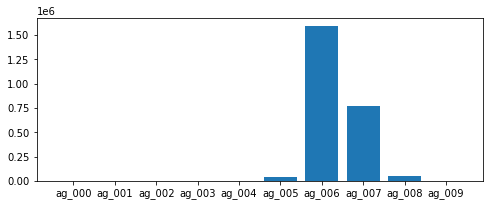

In [12]:
bar_diagram = df.iloc[3,7:17]
categories = bar_diagram.index
height = bar_diagram
figure, axis = plt.subplots(figsize = (8, 3))  
axis.bar(categories,bar_diagram);

Class 0: 39178
Class 1: 722
Proportion: 54.26 : 1


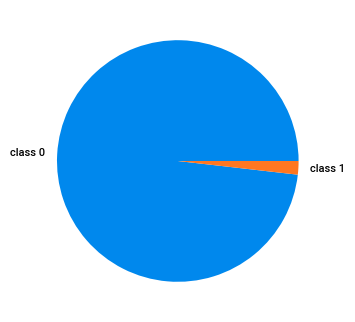

In [10]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

#target_count.plot(kind='bar', title='Count (target)');
plt.pie(target_count, labels= ["class 0", "class 1"])
plt.show()

In [11]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [14]:
X_train_p = prep_func(X_train)

In [15]:
X_train_p

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_009,ef_000,eg_000,histo_ag_mode,histo_ay_mode,histo_az_mode,histo_ba_mode,histo_cn_mode,histo_cs_mode,histo_ee_mode
0,21470,2.130706e+09,168.000000,0.0,0.0,0.0,0.0,0.0,11968.0,723426.0,...,0.0,0.0,0.0,4,8,6,0,3,5,6
1,40856,5.540000e+02,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3310.0,...,0.0,0.0,0.0,6,6,4,0,5,5,1
2,28,2.130706e+09,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,6,6,5,0,5,6,0
3,38682,3.440000e+02,326.000000,0.0,0.0,0.0,0.0,0.0,0.0,418.0,...,11238.0,0.0,0.0,6,8,4,1,5,5,0
4,62218,0.000000e+00,287230.886216,0.0,0.0,0.0,0.0,0.0,0.0,153220.0,...,10146.0,0.0,0.0,6,7,4,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39895,27012,6.840000e+02,524.000000,0.0,0.0,0.0,0.0,0.0,2864.0,1384726.0,...,180.0,0.0,0.0,4,8,5,0,3,5,7
39896,1926,2.130706e+09,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,38.0,...,0.0,0.0,0.0,7,7,5,1,5,5,5
39897,712,9.800000e+01,62.000000,0.0,0.0,0.0,0.0,0.0,802.0,37042.0,...,0.0,0.0,0.0,4,7,5,0,4,6,0
39898,61980,3.060000e+02,226.000000,0.0,0.0,0.0,0.0,0.0,0.0,244.0,...,90840.0,0.0,0.0,6,6,4,0,4,5,8


In [7]:
X_test

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,240,2.0,4.200000e+01,26.0,0.0,0.0,0.0,0.0,0.0,...,1138.0,454.0,668.0,2104.0,770.0,4166.0,0.0,0.0,0.0,0.0
1,1,82082,NaN,2.320000e+02,230.0,0.0,0.0,0.0,0.0,0.0,...,767958.0,392298.0,751326.0,594178.0,437398.0,277398.0,474834.0,17866.0,0.0,0.0
2,2,39670,NaN,2.130706e+09,210.0,0.0,0.0,0.0,0.0,0.0,...,192224.0,124728.0,292870.0,437064.0,345024.0,204602.0,152228.0,3350.0,0.0,0.0
3,3,39398,2.0,6.400000e+01,NaN,0.0,0.0,0.0,0.0,0.0,...,463584.0,139068.0,245752.0,282366.0,396572.0,137862.0,4288.0,0.0,0.0,0.0
4,4,263566,NaN,NaN,NaN,NaN,NaN,0.0,0.0,19700.0,...,1351888.0,625528.0,1114352.0,1400234.0,2466180.0,4273440.0,59648.0,30.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,17095,2,NaN,8.000000e+00,6.0,0.0,0.0,0.0,0.0,0.0,...,116.0,40.0,56.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0
17096,17096,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,...,492.0,70.0,74.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0
17097,17097,14,NaN,1.000000e+01,10.0,0.0,0.0,0.0,0.0,0.0,...,102.0,20.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17098,17098,38164,NaN,3.200000e+02,248.0,0.0,0.0,0.0,0.0,0.0,...,238826.0,130710.0,346042.0,398800.0,419896.0,155670.0,23756.0,18.0,0.0,0.0


In [7]:
#the features with high amount of missing values --> sparse attributes
sparse_attributes = {}
for i in df:
    if X_test[i].isna().sum() > len(X_test[i])*0.4:
        sparse_attributes[i]=X_test[i].isna().sum()
print(sparse_attributes)
sparse_attributes.keys()

{'ab_000': 13175, 'bl_000': 7738, 'bm_000': 11272, 'bn_000': 12514, 'bo_000': 13185, 'bp_000': 13576, 'bq_000': 13852, 'br_000': 14022, 'cr_000': 13175}


dict_keys(['ab_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'])

In [6]:
# Analyze single dataframe
import sweetviz as sv
train_report = sv.analyze(X_train)
train_report.show_html('train_report.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report train_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
